/var/folders/hx/s86zllf119jg8r80vywnjxnh0000gn/T/ipykernel_48646/2119383387.py:93: LangGraphDeprecationWarning: ToolExecutor is deprecated as of version 0.2.0 and will be removed in 0.3.0. Use langgraph.prebuilt.ToolNode instead.
  tool_executor = ToolExecutor(tools)


{'Researcher': {'messages': [HumanMessage(content='', additional_kwargs={'function_call': {'arguments': '{"query":"South Korea GDP per capita 2020 to 2024"}', 'name': 'tavily_search_results_json'}, 'refusal': None}, name='Researcher')], 'sender': 'Researcher'}}
----


/var/folders/hx/s86zllf119jg8r80vywnjxnh0000gn/T/ipykernel_48646/2119383387.py:102: LangGraphDeprecationWarning: ToolInvocation is deprecated as of version 0.2.0 and will be removed in 0.3.0. Use langgraph.prebuilt.ToolNode instead.
  action = ToolInvocation(tool=tool_name, tool_input=tool_input)


{'call_tool': {'messages': [FunctionMessage(content='tavily_search_results_json response: [{\'url\': \'https://tradingeconomics.com/south-korea/gdp-per-capita-us-dollar-wb-data.html\', \'content\': "GDP per capita (current US$) in South Korea was reported at 33121 USD in 2023, according to the World Bank collection of development indicators, compiled from officially recognized sources. South Korea - GDP per capita - actual values, historical data, forecasts and projections were sourced from the =\'blank\'>World Bank</a> on August of 2024."}, {\'url\': \'https://www.eda.admin.ch/content/dam/countries/countries-content/the-republic-of-korea/en/sbhk/ROK_Economic_Report.pdf\', \'content\': \'Per capita incomes in South Korea have been catching up to those of most advanced economies and the business climate and growth often outperform advanced economy peers. ... (28.06.2024) 2 IMF, GDP per capita, Korea, Republic of (27.06.2024) 3 OECD, Average Annual Wages data (27.06.2024) 4 IMF, World Ec

/var/folders/hx/s86zllf119jg8r80vywnjxnh0000gn/T/ipykernel_48646/2119383387.py:102: LangGraphDeprecationWarning: ToolInvocation is deprecated as of version 0.2.0 and will be removed in 0.3.0. Use langgraph.prebuilt.ToolNode instead.
  action = ToolInvocation(tool=tool_name, tool_input=tool_input)


{'call_tool': {'messages': [FunctionMessage(content='tavily_search_results_json response: [{\'url\': \'https://tradingeconomics.com/south-korea/gdp-per-capita-ppp\', \'content\': \'GDP per Capita PPP in South Korea is expected to reach 51685.00 USD by the end of 2024, according to Trading Economics global macro models and analysts expectations. In the long-term, the South Korea GDP per capita PPP is projected to trend around 53029.00 USD in 2025 and 54620.00 USD in 2026, according to our econometric models.\'}, {\'url\': \'https://tradingeconomics.com/south-korea/gdp-per-capita-us-dollar-wb-data.html\', \'content\': \'2024 Data 2025 Forecast 1960-2023 Historical. GDP per capita (current US$) in South Korea was reported at 33121 USD in 2023, according to the World Bank collection of development indicators, compiled from officially recognized sources. South Korea - GDP per capita - actual values, historical data, forecasts and projections were sourced from the ...\'}, {\'url\': \'https:/

/var/folders/hx/s86zllf119jg8r80vywnjxnh0000gn/T/ipykernel_48646/2119383387.py:102: LangGraphDeprecationWarning: ToolInvocation is deprecated as of version 0.2.0 and will be removed in 0.3.0. Use langgraph.prebuilt.ToolNode instead.
  action = ToolInvocation(tool=tool_name, tool_input=tool_input)


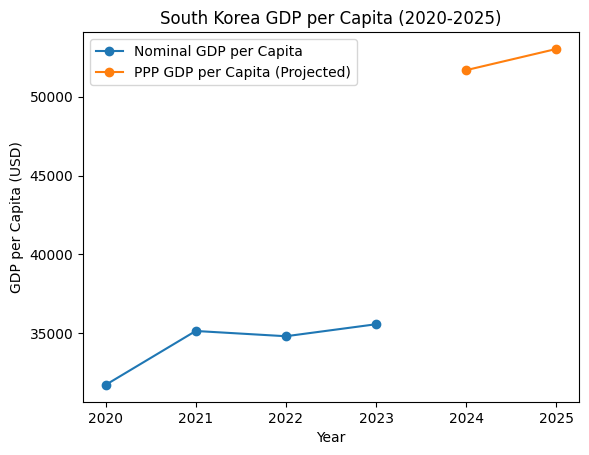

{'ChartGenerator': {'messages': [HumanMessage(content='', additional_kwargs={'function_call': {'arguments': '{"code":"import matplotlib.pyplot as plt\\n\\n# Data for South Korea\'s GDP per capita (Nominal and PPP)\\nyears = [2020, 2021, 2022, 2023, 2024, 2025]\\ngdp_per_capita_nominal = [31721, 35142, 34808.8, 35569.9, None, None]\\ngdp_per_capita_ppp = [None, None, None, None, 51685.00, 53029.00]\\n\\n# Create a figure and axis\\nfig, ax = plt.subplots()\\n\\n# Plot the nominal GDP per capita\\nax.plot(years[:4], gdp_per_capita_nominal[:4], label=\'Nominal GDP per Capita\', marker=\'o\')\\n\\n# Plot the PPP GDP per capita\\nax.plot(years[3:], gdp_per_capita_ppp[3:], label=\'PPP GDP per Capita (Projected)\', marker=\'o\')\\n\\n# Add labels and title\\nplt.xlabel(\'Year\')\\nplt.ylabel(\'GDP per Capita (USD)\')\\nplt.title(\'South Korea GDP per Capita (2020-2025)\')\\n\\n# Add legend\\nplt.legend()\\n\\n# Show the plot\\nplt.show()"}', 'name': 'python_repl'}, 'refusal': None}, name='Cha

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [13]:
from dotenv import load_dotenv
import json
from langchain_core.messages import BaseMessage, FunctionMessage, HumanMessage
from langchain.tools.render import format_tool_to_openai_function
from langchain.prompts import ChatPromptTemplate, MessagesPlaceholder
from langgraph.graph import END, StateGraph
from langgraph.prebuilt.tool_executor import ToolExecutor, ToolInvocation
from langchain_core.tools import tool
from typing import Annotated
from langchain_experimental.utilities import PythonREPL
from langchain_community.tools.tavily_search import TavilySearchResults
import operator
from typing import Sequence, Tuple, TypedDict, Union
from langchain_openai import ChatOpenAI
from typing_extensions import TypedDict
import functools

# 토큰 정보 로드
load_dotenv()

def create_safe_name(name):
    return ''.join(c for c in name if c.isalnum() or c in '_-')

def create_agent(llm, tools, system_message: str):
    functions = [format_tool_to_openai_function(t) for t in tools]
    prompt = ChatPromptTemplate.from_messages([
        ("system", "You are a helpful AI assistant, collaborating with other assistants."
         " Use the provided tools to progress towards answering the question."
         " If you are unable to fully answer, that's OK, another assistant with different tools "
         " will help where you left off. Execute what you can to make progress."
         " If you or any of the other assistants have the final answer or deliverable,"
         " prefix your response with FINAL ANSWER so the team knows to stop."
         " You have access to the following tools: {tool_names}.\n{system_message}"),
        MessagesPlaceholder(variable_name="messages"),
    ])
    prompt = prompt.partial(system_message=system_message)
    prompt = prompt.partial(tool_names=", ".join([create_safe_name(tool.name) for tool in tools]))
    return prompt | llm.bind_functions(functions)
    
tavily_tool = TavilySearchResults(max_results=5)
tavily_tool.name = create_safe_name(tavily_tool.name)
repl = PythonREPL()

@tool
def python_repl(code: Annotated[str, "The python code to execute to generate your chart."]):
    """Use this to execute python code. If you want to see the output of a value,
    you should print it out with `print(...)`. This is visible to the user."""
    try:
        result = repl.run(code)
    except BaseException as e:
        return f"Failed to execute. Error: {repr(e)}"
    return f"Successfully executed:\n```python\n{code}\n```\nStdout: {result}"

# 도구 이름을 안전하게 만듭니다
python_repl.name = create_safe_name("python_repl")

class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]
    sender: str

def agent_node(state, agent, name):
    result = agent.invoke(state)
    if isinstance(result, FunctionMessage):
        result.name = create_safe_name(result.name)
    else:
        result = HumanMessage(
            content=result.content,
            additional_kwargs=result.additional_kwargs,
            name=create_safe_name(name)
        )
    return {
        "messages": [result],
        "sender": create_safe_name(name),
    }

llm = ChatOpenAI(model="gpt-4-1106-preview")

research_agent = create_agent(
    llm,
    [tavily_tool],
    system_message="You should provide accurate data for the Chartgenerator to use.",
)
research_node = functools.partial(agent_node, agent=research_agent, name="Researcher")

chart_agent = create_agent(
    llm,
    [python_repl],
    system_message="Any charts you display will be visible by the user.",
)
chart_node = functools.partial(agent_node, agent=chart_agent, name="ChartGenerator")

tools = [tavily_tool, python_repl]
tool_executor = ToolExecutor(tools)

def tool_node(state):
    messages = state["messages"]
    last_message = messages[-1]
    tool_input = json.loads(last_message.additional_kwargs["function_call"]["arguments"])
    if len(tool_input) == 1 and "__arg1" in tool_input:
        tool_input = next(iter(tool_input.values()))
    tool_name = last_message.additional_kwargs["function_call"]["name"]
    action = ToolInvocation(tool=tool_name, tool_input=tool_input)
    response = tool_executor.invoke(action)
    
    safe_name = create_safe_name(action.tool)
    function_message = FunctionMessage(
        content=f"{tool_name} response: {str(response)}",
        name=safe_name
    )
    return {"messages": [function_message]}

def router(state):
    messages = state["messages"]
    last_message = messages[-1]
    if "function_call" in last_message.additional_kwargs:
        return "call_tool"
    if "FINAL ANSWER" in last_message.content:
        return "end"
    return "continue"

workflow = StateGraph(AgentState)

workflow.add_node("Researcher", research_node)
workflow.add_node("ChartGenerator", chart_node)
workflow.add_node("call_tool", tool_node)

workflow.add_conditional_edges(
    "Researcher",
    router,
    {"continue": "ChartGenerator", "call_tool": "call_tool", "end": END},
)
workflow.add_conditional_edges(
    "ChartGenerator",
    router,
    {"continue": "Researcher", "call_tool": "call_tool", "end": END},
)

workflow.add_conditional_edges(
    "call_tool",
    lambda x: x["sender"],
    {
        "Researcher": "Researcher",
        "ChartGenerator": "ChartGenerator",
    },
)
workflow.set_entry_point("Researcher")
graph = workflow.compile()

if __name__ == "__main__":
    for s in graph.stream(
        {
            "messages": [
                HumanMessage(
                    content="대한민국의 2020년 ~ 2024년의 1인당 국내총생산(GDP)대한 데이터를 찾아줘, "
                    "그리고 2025년에 대한 전망도 찾아줘, "
                    "마지막으로 수집한 데이터에 대한 그래프를 그려줘. "
                    "코드 작성을 완료했다면 종료해줘.",
                    name=create_safe_name("User")
                )
            ],
        },
        {"recursion_limit": 200},
    ):
        print(s)
        print("----")